<a href="https://colab.research.google.com/github/hiydavid/homl-learning/blob/main/projects/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST with TensorFlow

---
# Load libraries & data

In [1]:
# load librries
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from tensorflow import keras

# check version
print('matplotlib v.', mpl.__version__)
print('numpy v.', np.__version__)
print('pandas v.', pd.__version__)
print('sklearn v.', sklearn.__version__)
print('tensorflow v.', tf.__version__)
print('keras v.', keras.__version__)

matplotlib v. 3.2.2
numpy v. 1.19.5
pandas v. 1.1.5
sklearn v. 0.22.2.post1
tensorflow v. 2.6.0
keras v. 2.6.0


In [2]:
# load fashion mnist data and split into train/test sets
fmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fmnist.load_data()

# check shapes
print(X_train_full.shape, y_train_full.shape)
print(X_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# train-validation-test splits and rescale inputs to between 0 and 1
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# check shapes
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [4]:
# get class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

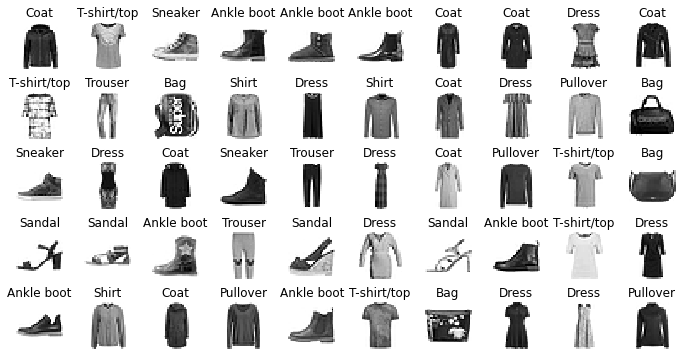

In [5]:
# show examples of the images from fashion mnist
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols*row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
        # print(n_cols, '*', row, '+', col, '=', index)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

---
# Basic Model

In [6]:
# function to clear session and set seed
def clear_session(seed = 1234):
    keras.backend.clear_session()
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [7]:
# clear & set session
clear_session(seed = 1234)

In [8]:
# compile model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


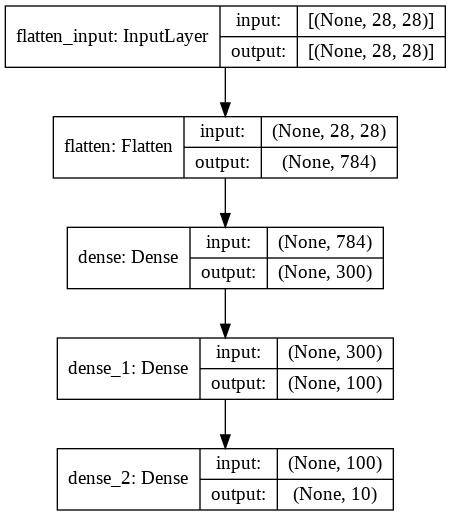

In [9]:
# graph output of basic model
keras.utils.plot_model(
    model,
    "fmnist_model_basic.png",
    show_shapes = True
    )

In [10]:
# compile model
model.compile(
    loss = keras.losses.sparse_categorical_crossentropy,
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    metrics = [keras.metrics.sparse_categorical_accuracy]
    )

In [11]:
# fit model
history = model.fit(
    X_train,
    y_train,
    epochs = 30,
    validation_data = (X_valid, y_valid)
    )

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 1.3801 - sparse_categorical_accuracy: 0.5994 - val_loss: 0.9454 - val_sparse_categorical_accuracy: 0.7002
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8460 - sparse_categorical_accuracy: 0.7209 - val_loss: 0.7441 - val_sparse_categorical_accuracy: 0.7604
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7137 - sparse_categorical_accuracy: 0.7658 - val_loss: 0.6571 - val_sparse_categorical_accuracy: 0.7914
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6460 - sparse_categorical_accuracy: 0.7875 - val_loss: 0.6059 - val_sparse_categorical_accuracy: 0.7996
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6026 - sparse_categorical_accuracy: 0.8005 - val_loss: 0.5699 - val_sparse_categorical_accuracy: 0.8136
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5718 - spars

313/313 [==============================] - 1s 2ms/step - loss: 0.4365 - sparse_categorical_accuracy: 0.8444



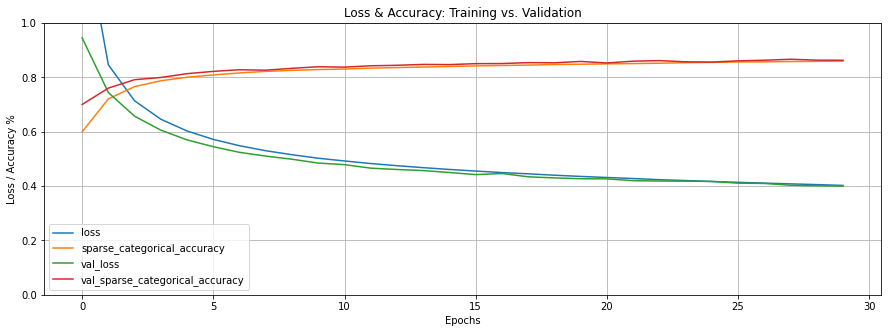

In [12]:
# plot loss & accuracy
def plot_eval(model_object, history_object):
    model_object.evaluate(X_test, y_test)
    print('')
    pd.DataFrame(history_object.history).plot(figsize=(15, 5))
    plt.title('Loss & Accuracy: Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss / Accuracy %')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# plot & evaluate
plot_eval(model, history)

In [13]:
# make probability prediction using model
y_proba = model.predict(X_test[:3])
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.2 , 0.01, 0.73],
       [0.  , 0.  , 0.91, 0.  , 0.01, 0.  , 0.09, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [14]:
# compare class prediction to actuals
y_pred = np.argmax(model.predict(X_test[:3]), axis=-1)
print('predicted:', np.array(class_names)[y_pred])
print('actual:', np.array(class_names)[y_test[:3]])

predicted: ['Ankle boot' 'Pullover' 'Trouser']
actual: ['Ankle boot' 'Pullover' 'Trouser']


---
# Experimenting with Adding Layers

* Test if same amount of neurons, but spread out in increasing number of layers would make a difference in loss & accuracy.
* Model1: 300 units in 1 hidden layer - **loss of 0.41 and accuracy of 0.86**
* Model2: 100 units in 3 hidden layers - **loss of 0.37 and accuracy of 0.87**
* Model3: 900 units in 3 hidden layers - **loss of 0.36 and accuracy of 0.88**

In [15]:
# create function
def build_model(nh=1, nn=300, lr=3e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=X_train.shape[1:]))
    for layer in range(nh):
        model.add(keras.layers.Dense(nn/nh, activation="relu"))
    model.add(keras.layers.Dense(10, activation='softmax'))
    loss = keras.losses.sparse_categorical_crossentropy
    optimizer = keras.optimizers.SGD(learning_rate=lr)
    metrics = keras.metrics.sparse_categorical_accuracy
    model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])
    return model

In [16]:
# first model
clear_session(seed = 1234)
model1 = build_model(nh=1, nn=300)
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step - loss: 0.4095 - sparse_categorical_accuracy: 0.8575



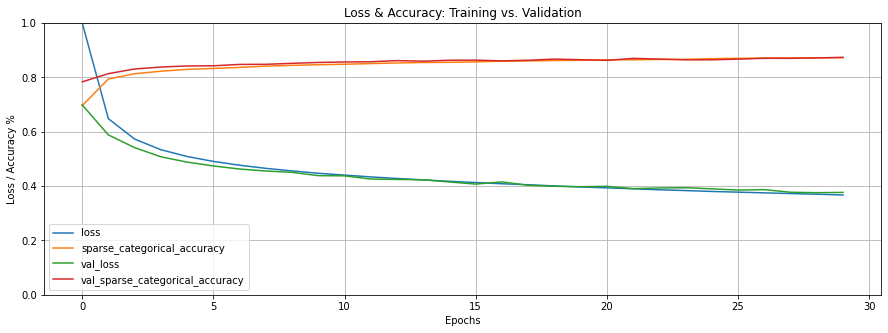

In [17]:
# fit model1 & show loss and accuracy
history1 = model1.fit(
    X_train, y_train, epochs = 30, verbose = 0,
    validation_data = (X_valid, y_valid)
    )

plot_eval(model1, history1)

In [18]:
# now build model2 with same nn but 3 layers
clear_session(seed = 1234)
model2 = build_model(nh=3, nn=300)
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step - loss: 0.3727 - sparse_categorical_accuracy: 0.8672



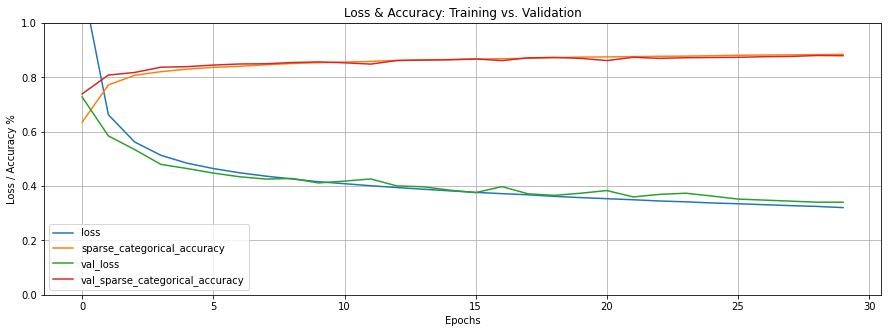

In [19]:
# fit model2 & show loss and accuracy
history2 = model2.fit(
    X_train, y_train, epochs = 30, verbose = 0,
    validation_data = (X_valid, y_valid)
    )

plot_eval(model2, history2)

In [20]:
# now build model3 with 3 times the nn but 3 layers
clear_session(seed = 1234)
model3 = build_model(nh=3, nn=900)
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 419,110
Trainable params: 419,110
Non-trainable params: 0
_________________________________________________________________


313/313 [==============================] - 1s 2ms/step - loss: 0.3554 - sparse_categorical_accuracy: 0.8738



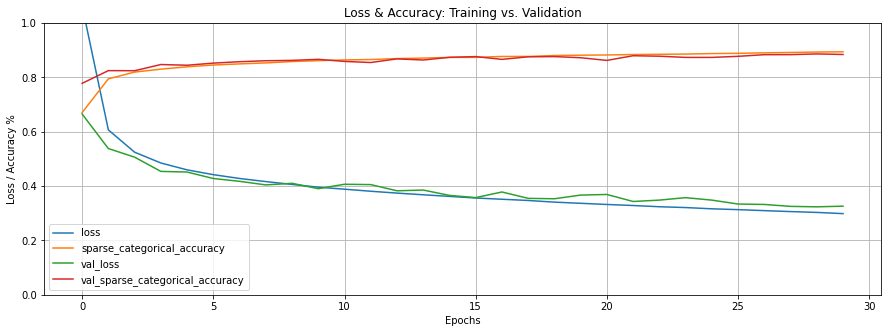

In [21]:
# fit model3 & show loss and accuracy
history3 = model3.fit(
    X_train, y_train, epochs = 30, verbose = 0,
    validation_data = (X_valid, y_valid)
    )

plot_eval(model3, history3)

---
# CNN Model

In [33]:
# load new mnist data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [34]:
# clear & set session
clear_session(seed = 1234)

In [35]:
# compile a CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

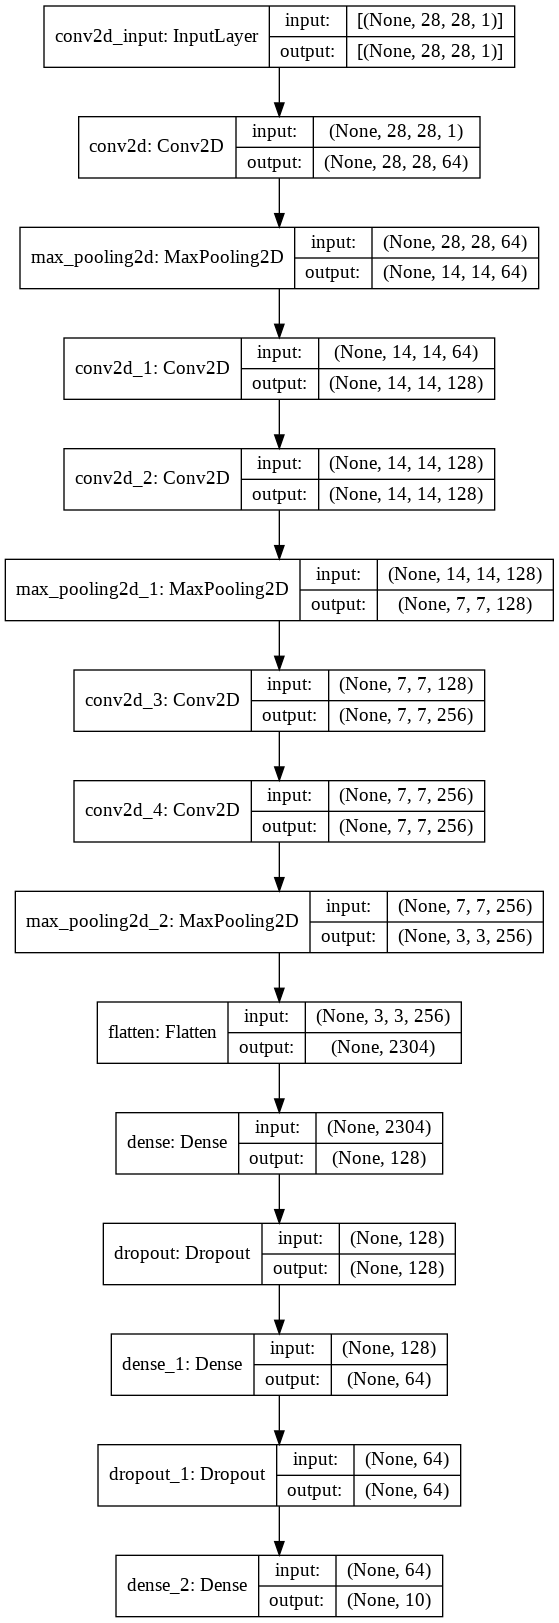

In [36]:
# graph output of CNN model
keras.utils.plot_model(
    model,
    "fmnist_model_basic.png",
    show_shapes = True
    )

In [37]:
# compile model
model.compile(
    loss = keras.losses.sparse_categorical_crossentropy,
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    metrics = [keras.metrics.sparse_categorical_accuracy]
    )

In [38]:
# fit model
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="nadam", 
    metrics=["accuracy"]
)

history = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    validation_data=(X_valid, y_valid)
)

score = model.evaluate(X_test, y_test)
X_new = X_test[:10]
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 44s 9ms/step - loss: 0.7115 - accuracy: 0.7558 - val_loss: 0.4135 - val_accuracy: 0.8490
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4137 - accuracy: 0.8600 - val_loss: 0.3229 - val_accuracy: 0.8884
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3588 - accuracy: 0.8782 - val_loss: 0.2883 - val_accuracy: 0.8954
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3277 - accuracy: 0.8895 - val_loss: 0.2996 - val_accuracy: 0.8904
Epoch 5/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3073 - accuracy: 0.8960 - val_loss: 0.3042 - val_accuracy: 0.9004
Epoch 6/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2854 - accuracy: 0.9032 - val_loss: 0.2742 - val_accuracy: 0.9030
Epoch 7/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2785 - accuracy: 0.9065 - val_loss: 0.2824 - val_ac

313/313 [==============================] - 1s 3ms/step - loss: 0.2897 - accuracy: 0.9025



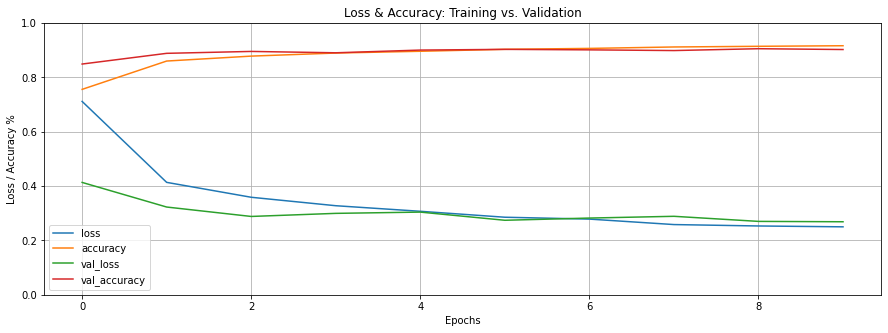

In [39]:
# plot output
plot_eval(model, history)